In [9]:
import cv2
import os
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import csv
import pandas as pd
import keras
from keras import models,Model
from keras.layers import Dense,GaussianNoise, Dropout,Input
from keras.utils import np_utils
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline
from skimage.feature import hog
%matplotlib inline 

In [10]:
dataSet = []
person = []
horiSet = []

count = 0
folder = "/home/jeet/CV Assignment/ML face images train Sketch"
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
#         print(img)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (200,200))
        fd, img = hog(img,visualise=True)
        img = np.ravel(img)
        if img is not None:
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person.append(numbers[0])
            horiSet.append(img.T)
            dataSet.append(img)
            count = count + 1
           
        
dataSet_test = []
person_test = []
horiSet_test = []

folder = "/home/jeet/CV Assignment/ML face images test Sketch translation"
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (200, 200))
        fd, img = hog(img, visualise=True)
        img = np.ravel(img)
        if img is not None:
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person_test.append(numbers[0])
            horiSet_test.append(img.T)
            dataSet_test.append(img)
            count = count + 1

/home/jeet/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [11]:
#Getting data in desired format and mapping the lables
dataSet = np.array(dataSet)
train = pd.DataFrame(dataSet)

person = np.array(person)
train['id'] = person.transpose()

unique_person = train['id']
unique_person = np.array(unique_person)
unique_person = np.unique(unique_person)
key = range(len(unique_person))

roll_dict = dict( zip(unique_person, key))

mapped_roll = np.vectorize(roll_dict.get)(person)
train['id'] = mapped_roll.transpose()

y = train['id'].values.astype('int64')
images = train.drop(['id'], axis=1, inplace=False)
x = (images.values).astype('uint8')

X_train = x
Y_train = y

dataSet_test = np.array(dataSet_test)
test = pd.DataFrame(dataSet_test)

person_test = np.array(person_test)
test['id'] = person_test.transpose()

mapped_roll_test = np.vectorize(roll_dict.get)(person_test)
test['id'] = mapped_roll_test.transpose()
print(test['id'])

temp = np_utils.to_categorical(test['id'])
print(temp[2])
print(temp.shape)


y_test = test['id'].values.astype('int64')
images = test.drop(['id'], axis=1, inplace=False)
x_test = (images.values).astype('uint8')

X_test = x_test
Y_test = y_test

0     25
1      6
2     18
3     21
4     24
5     28
6     10
7      9
8     23
9     15
10    12
11     6
12    21
13     8
14    26
15    34
16     4
17     1
18    10
19     1
20    22
21    17
22    13
23    27
24    33
25    29
26    17
27    16
28    27
29    11
      ..
38    16
39    35
40    29
41     3
42    28
43     3
44    23
45    22
46     0
47    32
48     7
49     9
50    32
51    30
52    20
53     2
54     4
55    31
56    15
57    19
58    33
59    18
60    20
61    31
62    34
63     8
64    35
65    26
66    14
67    13
Name: id, Length: 68, dtype: int64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(68, 36)


In [12]:
#Defining and training of the neural neural network
model = models.Sequential()
layers = 2
units = 256

#Input layer
model.add(Dense(units, input_dim=40000, activation='relu'))

#Hidden Layer
for i in range(layers):
    model.add(Dense(72, activation='relu'))
    model.add(Dropout(0.1))
    
#Output layer
model.add(Dense(36, activation='softmax'))

#Building model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training model
model.fit(X_train,Y_train,batch_size=70,validation_split=0.2,epochs=150,verbose=2)

Train on 171 samples, validate on 43 samples
Epoch 1/150
 - 1s - loss: 8.7910 - acc: 0.0819 - val_loss: 11.7643 - val_acc: 0.0698
Epoch 2/150
 - 1s - loss: 12.6615 - acc: 0.0819 - val_loss: 13.8008 - val_acc: 0.0698
Epoch 3/150
 - 0s - loss: 12.7388 - acc: 0.1287 - val_loss: 14.0572 - val_acc: 0.0698
Epoch 4/150
 - 1s - loss: 12.5161 - acc: 0.1345 - val_loss: 13.6297 - val_acc: 0.0465
Epoch 5/150
 - 1s - loss: 12.5027 - acc: 0.1111 - val_loss: 12.6009 - val_acc: 0.1163
Epoch 6/150
 - 1s - loss: 11.6581 - acc: 0.1871 - val_loss: 13.2957 - val_acc: 0.0930
Epoch 7/150
 - 1s - loss: 11.7217 - acc: 0.1637 - val_loss: 11.8659 - val_acc: 0.1860
Epoch 8/150
 - 1s - loss: 10.6665 - acc: 0.2105 - val_loss: 9.7515 - val_acc: 0.1395
Epoch 9/150
 - 1s - loss: 9.0395 - acc: 0.2456 - val_loss: 9.4078 - val_acc: 0.1395
Epoch 10/150
 - 1s - loss: 8.0704 - acc: 0.2515 - val_loss: 7.3336 - val_acc: 0.1163
Epoch 11/150
 - 1s - loss: 6.1159 - acc: 0.2047 - val_loss: 4.8833 - val_acc: 0.1395
Epoch 12/150
 -

Epoch 97/150
 - 1s - loss: 0.5188 - acc: 0.8421 - val_loss: 2.7495 - val_acc: 0.4419
Epoch 98/150
 - 1s - loss: 0.4832 - acc: 0.8830 - val_loss: 2.7746 - val_acc: 0.4186
Epoch 99/150
 - 1s - loss: 0.8762 - acc: 0.8363 - val_loss: 2.3370 - val_acc: 0.4651
Epoch 100/150
 - 1s - loss: 0.4503 - acc: 0.9006 - val_loss: 2.3616 - val_acc: 0.4651
Epoch 101/150
 - 1s - loss: 0.5838 - acc: 0.8304 - val_loss: 2.5011 - val_acc: 0.4186
Epoch 102/150
 - 1s - loss: 0.5890 - acc: 0.8655 - val_loss: 2.4898 - val_acc: 0.5349
Epoch 103/150
 - 1s - loss: 0.5132 - acc: 0.8480 - val_loss: 2.4861 - val_acc: 0.5116
Epoch 104/150
 - 1s - loss: 0.7008 - acc: 0.8480 - val_loss: 2.7811 - val_acc: 0.3953
Epoch 105/150
 - 1s - loss: 0.5793 - acc: 0.8187 - val_loss: 2.5351 - val_acc: 0.4419
Epoch 106/150
 - 1s - loss: 0.5763 - acc: 0.8246 - val_loss: 2.3531 - val_acc: 0.3953
Epoch 107/150
 - 1s - loss: 0.5460 - acc: 0.8363 - val_loss: 2.4668 - val_acc: 0.3953
Epoch 108/150
 - 1s - loss: 0.4220 - acc: 0.8596 - val_lo

In [13]:
predictions = model.predict_classes(X_test, verbose=0)

def write_predictions(predictions, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "id": predictions}).to_csv(fname, index=False, header=True)

write_predictions(predictions, "out.csv")


In [14]:
result = pd.read_csv('out.csv')
result = result['id']
result = np.array(result)
error = np.array(Y_test - result)
error = error[error != 0]
error = error.size/Y_test.size

print('Accuracy : ',1-error)

result

Accuracy :  0.07352941176470584


array([35,  6, 35, 35, 35,  6,  6, 27, 27, 15, 35,  6, 35, 35, 35, 35,  6,
       22, 28, 29, 10,  6, 24, 35, 35, 31,  6,  6, 28,  5, 35, 35,  4,  5,
       35,  5,  6,  6,  6, 35, 35, 35,  6, 35, 35,  5, 17, 35, 27, 27, 27,
       27, 27,  6, 27, 35, 35,  6, 35, 35, 27,  6, 35, 27, 35,  8, 35,  5])

In [15]:
score = model.predict_proba(X_test)


Average precision score, micro-averaged over all classes: 0.07


/home/jeet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


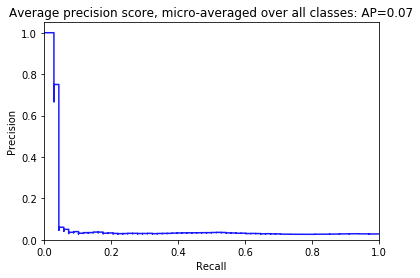

In [16]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(35):
    precision[i], recall[i], _ = precision_recall_curve(temp[:, i],
                                                        score[:, i])
    average_precision[i] = average_precision_score(temp[:, i], score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(temp.ravel(),
    score.ravel())
average_precision["micro"] = average_precision_score(temp, score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

fig = plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.9,
         where='post')
#plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
#                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.show()
fig.savefig('HOG-ANN(sketch translation image).png',dpi=100)